What needs to be done:
- cross validation (K-folds,...)
- Outlier removal
- Feature selection - RFE, Lasso...
- Convert String Variables into float (One hot encoder?)
- Normalization
- MORE THINGS
- models

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import scipy.stats as stats
from scipy.stats import chi2_contingency

In [48]:
train_demo=pd.read_excel('train_demo.xlsx')
train_habits=pd.read_excel('train_habits.xlsx')
train_health=pd.read_excel('train_health.xlsx')

In [49]:
print(train_demo.shape)
print(train_habits.shape)
print(train_health.shape)

(800, 6)
(800, 6)
(800, 9)


In [50]:
train_df = train_demo.merge(train_habits, on = 'PatientID').merge(train_health, on = 'PatientID')
train_df.head(3)

,PatientID,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
0,1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1,1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
2,1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.


In [51]:
train_df.set_index('PatientID', inplace=True)

In [52]:
train_df.sort_index(axis=0, inplace=True)

In [53]:
train_df.head(3)

,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,,
1001,Mr. Charles Bolek,1969,East of England,High School Graduate,0,Yes,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,174,54,207,140,19,15,Not sure,Neither I nor my immediate family have diabetes.
1003,Mr. Boyd Cook,1961,Yorkshire and the Humber,High School Graduate,0,No,I usually consume alcohol every day,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,173,76,207,148,20,0,Not sure,Neither I nor my immediate family have diabetes.
1004,Mrs. Maggie Jones,1960,London,University Complete (3 or more years),0,Yes,I usually consume alcohol every day,No,5 to 6 pieces of fruit in average,Between one liter and two liters,155,59,298,138,8,9,More than 3 years,Neither I nor my immediate family have diabetes.


In [54]:
train_df.value_counts('Disease')

Disease
1    411
0    389
dtype: int64

In [55]:
train_df['Gender'] = train_df.apply(lambda row: 'Male' if row['Name'].startswith('Mr.') else 'Female', axis=1)

In [56]:
#Checking if it's right
train_df[['Name','Gender']]

,Name,Gender
PatientID,,
1001,Mr. Charles Bolek,Male
1003,Mr. Boyd Cook,Male
1004,Mrs. Maggie Jones,Female
1005,Mrs. Hazel Eison,Female
1006,Mr. Luis Pham,Male
...,...,...
2019,Mr. William Hurd,Male
2020,Mr. Jim Garrett,Male
2022,Mr. Barry Holman,Male


In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1001 to 2024
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         787 non-null    object
 4   Disease           800 non-null    int64 
 5   Smoking_Habit     800 non-null    object
 6   Drinking_Habit    800 non-null    object
 7   Exercise          800 non-null    object
 8   Fruit_Habit       800 non-null    object
 9   Water_Habit       800 non-null    object
 10  Height            800 non-null    int64 
 11  Weight            800 non-null    int64 
 12  High_Cholesterol  800 non-null    int64 
 13  Blood_Pressure    800 non-null    int64 
 14  Mental_Health     800 non-null    int64 
 15  Physical_Health   800 non-null    int64 
 16  Checkup           800 non-null    object
 17  Diabetes    

<a class="anchor" id="4th-bullet">


###  Fill Missing on Train

</a>

In [58]:
train_df['Education'].fillna('Unknown', inplace = True)
train_df[train_df['Education']=='Unknown'].head(3)

,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Gender
PatientID,,,,,,,,,,,,,,,,,,,
1048,Mrs. Margaret Wysong,1956,East Midlands,Unknown,1,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,166,67,282,146,18,0,More than 3 years,I have/had pregnancy diabetes or borderline di...,Female
1072,Mr. Steven Fisher,1866,East Midlands,Unknown,0,Yes,I consider myself a social drinker,Yes,1 to 2 pieces of fruit in average,Between one liter and two liters,171,62,253,125,16,5,More than 3 years,Neither I nor my immediate family have diabetes.,Male
1085,Mr. Robert Swenson,1978,South West,Unknown,1,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,165,72,224,120,22,0,More than 3 years,I do have diabetes,Male


In [59]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1001 to 2024
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         800 non-null    object
 4   Disease           800 non-null    int64 
 5   Smoking_Habit     800 non-null    object
 6   Drinking_Habit    800 non-null    object
 7   Exercise          800 non-null    object
 8   Fruit_Habit       800 non-null    object
 9   Water_Habit       800 non-null    object
 10  Height            800 non-null    int64 
 11  Weight            800 non-null    int64 
 12  High_Cholesterol  800 non-null    int64 
 13  Blood_Pressure    800 non-null    int64 
 14  Mental_Health     800 non-null    int64 
 15  Physical_Health   800 non-null    int64 
 16  Checkup           800 non-null    object
 17  Diabetes    

<a class="anchor" id="4th-bullet">


###  Convert yes/no to 1/0
Exercise and smoking habits

</a>

In [60]:
train_df['Smoking_Habit']=pd.Series(np.where(train_df.Smoking_Habit.values == 'Yes', 1, 0),train_df.index)
train_df['Exercise']=pd.Series(np.where(train_df.Exercise.values == 'Yes', 1, 0),train_df.index)

In [74]:
train_df.head(3)

,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Gender
PatientID,,,,,,,,,,,,,,,,,,,
1001,Mr. Charles Bolek,1969,East of England,High School Graduate,0,1,I consider myself a social drinker,1,Less than 1. I do not consume fruits every day.,Between one liter and two liters,174,54,207,140,19,15,Not sure,Neither I nor my immediate family have diabetes.,Male
1003,Mr. Boyd Cook,1961,Yorkshire and the Humber,High School Graduate,0,0,I usually consume alcohol every day,0,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,173,76,207,148,20,0,Not sure,Neither I nor my immediate family have diabetes.,Male
1004,Mrs. Maggie Jones,1960,London,University Complete (3 or more years),0,1,I usually consume alcohol every day,0,5 to 6 pieces of fruit in average,Between one liter and two liters,155,59,298,138,8,9,More than 3 years,Neither I nor my immediate family have diabetes.,Female


In [62]:
#Check for any kind of mistakes (some rows having disease with other value)
train_df['Disease'].unique()

array([0, 1], dtype=int64)

In [63]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth_Year,800.0,1966.04375,15.421872,1855.0,1961.00,1966.0,1974.0,1993.0
Disease,800.0,0.51375,0.500124,0.0,0.00,1.0,1.0,1.0
Smoking_Habit,800.0,0.15875,0.365671,0.0,0.00,0.0,0.0,1.0
Exercise,800.0,0.33000,0.470507,0.0,0.00,0.0,1.0,1.0
Height,800.0,167.80625,7.976888,151.0,162.00,167.0,173.0,180.0
Weight,800.0,67.82750,12.113470,40.0,58.00,68.0,77.0,97.0
High_Cholesterol,800.0,249.32250,51.566631,130.0,213.75,244.0,280.0,568.0
Blood_Pressure,800.0,131.05375,17.052693,94.0,120.00,130.0,140.0,200.0
Mental_Health,800.0,17.34500,5.385139,0.0,13.00,18.0,21.0,29.0
Physical_Health,800.0,4.55875,5.449189,0.0,0.00,3.0,7.0,30.0


<a class="anchor" id="4th-bullet">


###  Target Variable

</a>

In [64]:
train_data = train_df.drop('Disease', axis=1).copy()
train_target = train_df['Disease'].copy()

<a class="anchor" id="4th-bullet">


###  Split numeric and categorical

</a>

In [76]:
##VER SE AS VARIAVEIS COM 0 E 1 SAO NUMERICAS OU CATEGORICAS
train_data_num = train_data.select_dtypes(include=np.number).set_index(train_df.index).copy()
train_data_cat = train_data.select_dtypes(exclude=np.number).set_index(train_df.index).copy()

<a class="anchor" id="4th-bullet">


###  Scaler

</a>

In [66]:
scaler = MinMaxScaler().fit(train_data_num)
train_data_num_scaled = scaler.transform(train_data_num)
train_data_num_scaled = pd.DataFrame(train_data_num_scaled, columns = train_data_num.columns).set_index(train_data.index)
train_data_num_scaled.head(3)

,Birth_Year,Smoking_Habit,Exercise,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
PatientID,,,,,,,,,
1001,0.826087,1.0,1.0,0.793103,0.245614,0.175799,0.433962,0.655172,0.5
1003,0.768116,0.0,0.0,0.758621,0.631579,0.175799,0.509434,0.689655,0.0
1004,0.760870,1.0,0.0,0.137931,0.333333,0.383562,0.415094,0.275862,0.3


In [67]:
train_data_num_scaled.var()

Birth_Year          0.012489
Smoking_Habit       0.133716
Exercise            0.221377
Height              0.075661
Weight              0.045163
High_Cholesterol    0.013861
Blood_Pressure      0.025881
Mental_Health       0.034482
Physical_Health     0.032993
dtype: float64

In [68]:
train_data_scaled=train_data_num_scaled.join(train_target)
train_data_scaled.head(3)

,Birth_Year,Smoking_Habit,Exercise,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Disease
PatientID,,,,,,,,,,
1001,0.826087,1.0,1.0,0.793103,0.245614,0.175799,0.433962,0.655172,0.5,0
1003,0.768116,0.0,0.0,0.758621,0.631579,0.175799,0.509434,0.689655,0.0,0
1004,0.760870,1.0,0.0,0.137931,0.333333,0.383562,0.415094,0.275862,0.3,0


<a class="anchor" id="4th-bullet">


###  PEARSON

</a>

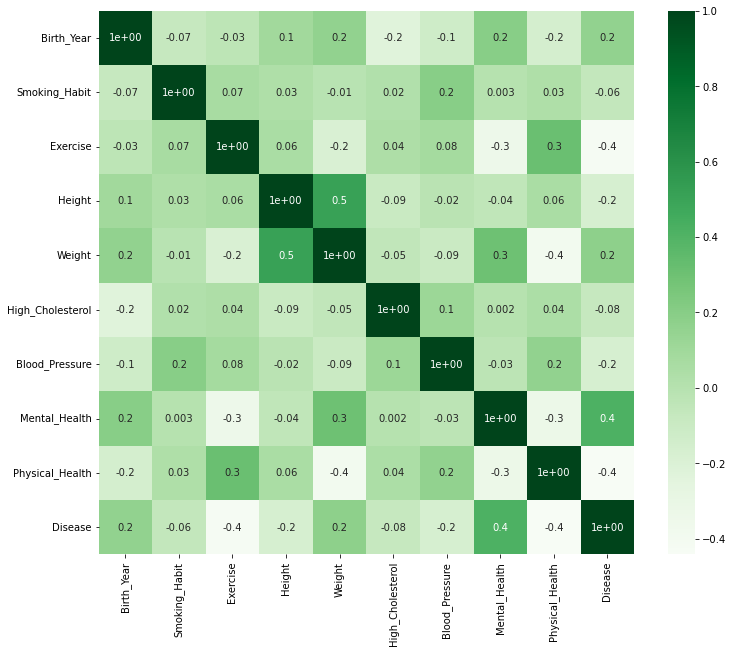

In [69]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Greens, fmt='.1')
    plt.show()
cor_pearson = train_data_scaled.corr()
cor_heatmap(cor_pearson)

<a class="anchor" id="4th-bullet">


###  SPEARMAN

</a>

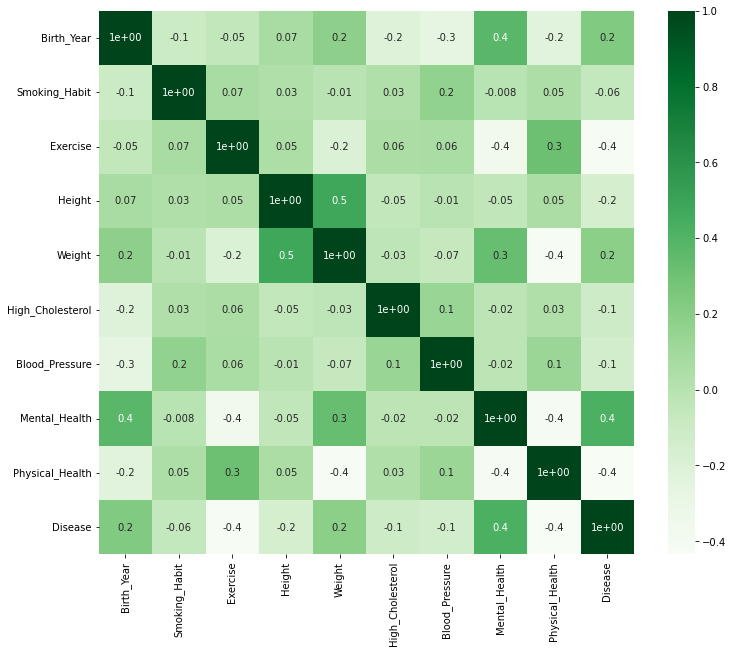

In [70]:
cor_spearman = train_data_scaled.corr(method ='spearman')
cor_heatmap(cor_spearman)

In [71]:
def Test_Independence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [72]:
for var in train_data_cat:
    Test_Independence(train_data_cat[var],train_target, var)

Name is NOT an important predictor. (Discard Name from model)
Region is NOT an important predictor. (Discard Region from model)
Education is NOT an important predictor. (Discard Education from model)
Drinking_Habit is IMPORTANT for Prediction
Fruit_Habit is IMPORTANT for Prediction
Water_Habit is NOT an important predictor. (Discard Water_Habit from model)
Checkup is IMPORTANT for Prediction
Diabetes is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction


In [73]:
train_data_cat.drop(['Name', 'Region', 'Education', 'Smoking_Habit', 'Water_Habit'],axis=1, inplace=True)

KeyError: "['Smoking_Habit'] not found in axis"

In [ ]:
train_data_cat.head(3)

,Drinking_Habit,Exercise,Fruit_Habit,Checkup,Diabetes,Gender
PatientID,,,,,,
1001,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Not sure,Neither I nor my immediate family have diabetes.,Male
1003,I usually consume alcohol every day,No,1 to 2 pieces of fruit in average,Not sure,Neither I nor my immediate family have diabetes.,Male
1004,I usually consume alcohol every day,No,5 to 6 pieces of fruit in average,More than 3 years,Neither I nor my immediate family have diabetes.,Female


In [ ]:
train_data.head()

,Name,Birth_Year,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Gender
PatientID,,,,,,,,,,,,,,,,,,
1001,Mr. Charles Bolek,1969,East of England,High School Graduate,Yes,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,174,54,207,140,19,15,Not sure,Neither I nor my immediate family have diabetes.,Male
1003,Mr. Boyd Cook,1961,Yorkshire and the Humber,High School Graduate,No,I usually consume alcohol every day,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,173,76,207,148,20,0,Not sure,Neither I nor my immediate family have diabetes.,Male
1004,Mrs. Maggie Jones,1960,London,University Complete (3 or more years),Yes,I usually consume alcohol every day,No,5 to 6 pieces of fruit in average,Between one liter and two liters,155,59,298,138,8,9,More than 3 years,Neither I nor my immediate family have diabetes.,Female
1005,Mrs. Hazel Eison,1964,South West,University Complete (3 or more years),No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,158,56,252,100,11,4,More than 3 years,Neither I nor my immediate family have diabetes.,Female
1006,Mr. Luis Pham,1964,Yorkshire and the Humber,High School Graduate,No,I do not consume any type of alcohol,No,5 to 6 pieces of fruit in average,Between one liter and two liters,174,55,322,114,15,21,Less than 3 years but more than 1 year,Neither I nor my immediate family have diabetes.,Male
